Vamos a trabajar con datos de verdad. Podéis encontrar una serie de conjuntos de datos que vamos a meter en dataframes:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Una forma cómoda de cargar los datos puede ser subirlos en formato .csv a un *gist* de *GitHub* y utilizar la función *read_csv* de pandas pasándole la url del *gist*.<br></br>
No va a hacer falta que lo hagáis en estos ejercicios, pero está bien saberlo para el futuro. Os explicaremos bien cómo se hace cuando os toque usarlo.

In [5]:
gasolina_url = "https://gist.githubusercontent.com/w-dan/4a788daed122583e3cabd7b81a2b3aea/raw/9129ed5974093d73623fb653899f385325c0e18e/gas.csv"
felicidad_url = "https://gist.githubusercontent.com/w-dan/43e1bb780e5a6623764f78925aa31337/raw/ecc871ef48fc16a8364ce06d7e72a7a4ce07f790/happiness.csv"

In [6]:
df_gasolina = pd.read_csv(gasolina_url)
df_felicidad = pd.read_csv(felicidad_url)

Visualizamos el dataframe de los precios mensuales de gasolina, por ejemplo:

In [5]:
df_gasolina

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Current Year Cumulative Production
0,2023,16,2393748000,2417856000,3.964972e+10
1,2023,15,2367876000,2324364000,3.725597e+10
2,2023,14,2222052000,2402568000,3.488810e+10
3,2023,13,2209116000,2858856000,3.266605e+10
4,2023,12,2742138000,2641884000,3.045693e+10
...,...,...,...,...,...
168,2020,5,2688630000,2675106000,1.391590e+10
169,2020,4,2876496000,2723028000,1.122727e+10
170,2020,3,2819460000,2741256000,8.350776e+09
171,2020,2,2750076000,2699508000,5.531316e+09


Poco legible, ¿verdad? Vamos a intentar hacerlo un poco más visible.

## Ejercicio 1

Representa gráficamente las columnas "Current Year Production" y "Current Year Cumulative Production". ¿Qué distribución dirías que siguen por su aspecto? ¿Borrarías datos? En caso afirmativo, ¿cuáles?
*Esto aplica para todos los ejercicios, pero puedes insertar tantas celdas de código como necesites.*

<AxesSubplot: title={'center': 'MinMaxScaler'}, ylabel='Density'>

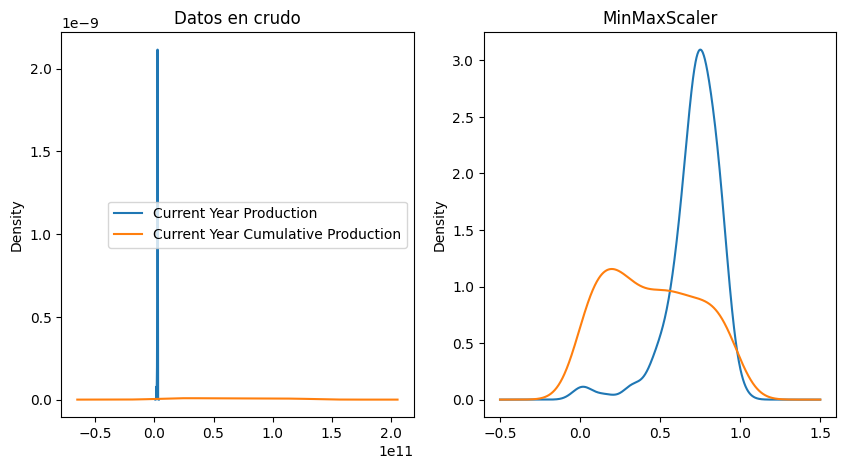

In [32]:
from sklearn.preprocessing import MinMaxScaler

columnas_buscadas= ["Current Year Production", "Current Year Cumulative Production"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
df_gasolina[columnas_buscadas].plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(df_gasolina[columnas_buscadas]))
transformed_df.plot.kde(ax=axs[1], legend=False)

Por su forma parece que 'Current Year Production' sigue una distribucion beta o normal mientras que 'Current Year Cumulative Production' sigue una distribucion uniforme

## Ejercicio 2

Crea una nueva columna "Diferencia" en el dataframe que contenga la diferencia entre la cantidad producida en el año actual (Current Year Production) y el año anterior (Previous Year Production).

In [7]:
df_gasolina['Diferencia'] = df_gasolina['Current Year Production'] - df_gasolina['Previous Year Production']

df_gasolina[df_gasolina['Fiscal Week'] == 16]

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Current Year Cumulative Production,Diferencia
0,2023,16,2393748000,2417856000,3.964972e+10,-24108000
53,2022,16,2417856000,2384928000,4.267439e+10,32928000
105,2021,16,2384928000,2546628000,3.838876e+10,-161700000
157,2020,16,2546628000,2607192000,4.292165e+10,-60564000


## Ejercicio 3

## 3.1
Acota los valores de la columna "Current Year Cumulative Production" entre 0 y 1.

In [46]:

data_reshape = df_gasolina['Current Year Cumulative Production'].values.reshape(-1, 1)

scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(data_reshape), columns=['Scaled Current Year Cumulative Production'])
scaled_df


,Scaled Current Year Cumulative Production
0,0.274526
1,0.256868
2,0.239402
3,0.223011
4,0.206716
...,...
168,0.084702
169,0.064869
170,0.043651
171,0.022853


### 3.2
¿Qué columnas eliminarías por no aportar nada de información?

La columna 'Previous Year Production' viene a ser la columna 'Current Year Production' solo que desplazada un año.
Puede ser util para realizar calculos como la columna 'Diferencia' mas facilmente pero o aporta informacion adicional por si misma  

### 3.3

¿Podrías aplicar un StandardScaler a alguna de las columnas del DataFrame? ¿Por qué?

Podriamos usar StandarScaler para analizar las columnas cuyos datos sigan una distribucion normal, en este caso podria ser la columna Current Year Production y las relacionadas directamente a ella como relacionadas Previous Year Production o Diferencia

<AxesSubplot: title={'center': 'StandardScaler'}, ylabel='Density'>

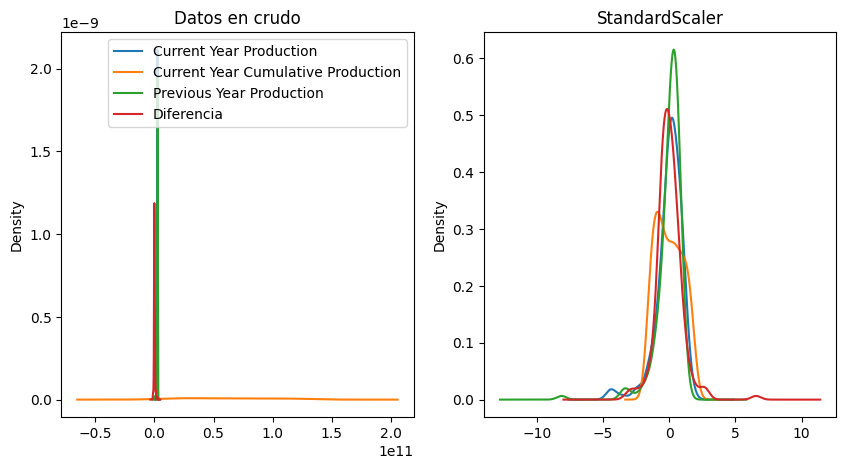

In [9]:
from sklearn.preprocessing import StandardScaler

columnas_buscadas= ["Current Year Production", "Current Year Cumulative Production", "Previous Year Production", "Diferencia"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
df_gasolina[columnas_buscadas].plot.kde(ax=axs[0])

axs[1].set_title('StandardScaler')
transformed_df = pd.DataFrame(StandardScaler().fit_transform(df_gasolina[columnas_buscadas]))
transformed_df.plot.kde(ax=axs[1], legend=False)


## Ejercicio 4

### 4.1

En el DataFrame `df_felicidad`, convierte la columna "Country or region" a un valor numérico. Utiliza los dos métodos que has aprendido.

In [10]:
from sklearn.preprocessing import OneHotEncoder
columna_pedida = df_felicidad[['Country or region']]
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(columna_pedida).toarray()
onehot_encoded




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
from sklearn.preprocessing import OrdinalEncoder
columna_pedida2 = df_felicidad[['Country or region']]
columna_pedida2
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(columna_pedida2)
ordinal_encoded

array([[ 44.],
       [ 36.],
       [106.],
       [133.],
       [ 58.],
       [ 99.],
       [ 23.],
       [132.],
       [ 82.],
       [100.],
       [  6.],
       [  5.],
       [ 64.],
       [ 49.],
       [147.],
       [ 63.],
       [ 32.],
       [ 17.],
       [ 35.],
       [ 11.],
       [146.],
       [ 45.],
       [  8.],
       [ 26.],
       [ 87.],
       [ 90.],
       [119.],
       [135.],
       [130.],
       [123.],
       [ 65.],
       [125.],
       [ 52.],
       [149.],
       [109.],
       [ 72.],
       [124.],
       [  3.],
       [ 67.],
       [ 28.],
       [ 81.],
       [ 34.],
       [115.],
       [ 41.],
       [ 40.],
       [150.],
       [138.],
       [113.],
       [ 70.],
       [116.],
       [ 73.],
       [ 85.],
       [121.],
       [  2.],
       [ 89.],
       [ 76.],
       [ 57.],
       [101.],
       [151.],
       [ 68.],
       [114.],
       [ 55.],
       [ 38.],
       [ 33.],
       [112.],
       [128.],
       [11

### 4.2

¿Cuál de los dos métodos te parece mejor? ¿Por qué?
Para este ejemplo es mejor el OrdinalEncoder porque todos los valores son únicos y no se repiten, al ser paises, por lo que el OneHotEncoder no tendría mucho sentido

# Ejercicio 5

### 5.1

Averigua si el DataFrame `df_felicidad` tiene elementos nulos. Consigue todas las filas en las que haya elementos nulos.

In [12]:

valores_nulos = df_felicidad.isnull().any().any()

if valores_nulos:
    filas_con_valores_nulos = df_felicidad[df_felicidad.isnull().any(axis=1)]
    print(filas_con_valores_nulos)
else:
    print("No hay elementos nulos en el DataFrame.")

     Overall rank_2019         Country or region  Score_2019  Rank_2018  \
27                  25                    Taiwan       6.446       26.0   
35                  46                    Kosovo       6.100       66.0   
42                  29                     Qatar       6.374       32.0   
68                  78    Bosnia and Herzegovina       5.386       93.0   
78                  64           Northern Cyprus       5.718       58.0   
84                  76                 Hong Kong       5.430       76.0   
86                 103       Congo (Brazzaville)       4.812      114.0   
87                  93                     China       5.191       86.0   
94                 112                   Somalia       4.668       98.0   
99                  84           North Macedonia       5.274        NaN   
103                105                      Laos       4.796      110.0   
108                 95                    Bhutan       5.082       97.0   
118                123   

### 5.2

Elimina los nulos de `df_felicidad`.

In [13]:
df_felicidad_sin_valores_nulos = df_felicidad.dropna()
df_felicidad_sin_valores_nulos

,Overall rank_2019,Country or region,Score_2019,Rank_2018,Score_2018,Rank_2017,Score_2017,Rank_2016,Score_2016,2020.Rank,2020_Score,Rank_2022,Score_2022,2021. score,2021.Rank
0,1,Finland,7.769,1.0,7.632,5.0,7.469,5.0,7.413,1.0,7.809,1.0,7.842,7.842,1.0
1,2,Denmark,7.600,3.0,7.555,2.0,7.522,1.0,7.526,2.0,7.646,2.0,7.620,7.620,2.0
2,3,Norway,7.554,2.0,7.594,1.0,7.537,4.0,7.498,5.0,7.488,6.0,7.392,7.392,6.0
3,6,Switzerland,7.480,5.0,7.487,4.0,7.494,2.0,7.509,3.0,7.560,3.0,7.571,7.571,3.0
4,4,Iceland,7.494,4.0,7.495,3.0,7.504,3.0,7.501,4.0,7.504,4.0,7.554,7.554,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,147,Haiti,3.597,148.0,3.582,145.0,3.603,136.0,4.028,142.0,3.721,140.0,3.615,3.615,143.0
144,148,Botswana,3.488,146.0,3.590,142.0,3.766,137.0,3.974,147.0,3.479,143.0,3.467,3.467,146.0
145,154,Afghanistan,3.203,145.0,3.632,141.0,3.794,154.0,3.360,153.0,2.567,146.0,2.523,2.523,149.0
149,152,Rwanda,3.334,151.0,3.408,151.0,3.471,152.0,3.515,150.0,3.312,144.0,3.415,3.415,147.0


### 5.3

Sustituye todos los nulos que haya en la columna "Score_2018" por la media de los valores de esa columna.

In [14]:
media_score_2018 = df_felicidad['Score_2018'].mean()
df_felicidad['Score_2018'].fillna(media_score_2018, inplace=True)
df_felicidad

,Overall rank_2019,Country or region,Score_2019,Rank_2018,Score_2018,Rank_2017,Score_2017,Rank_2016,Score_2016,2020.Rank,2020_Score,Rank_2022,Score_2022,2021. score,2021.Rank
0,1,Finland,7.769,1.0,7.632,5.0,7.469,5.0,7.413,1.0,7.809,1.0,7.842,7.842,1.0
1,2,Denmark,7.600,3.0,7.555,2.0,7.522,1.0,7.526,2.0,7.646,2.0,7.620,7.620,2.0
2,3,Norway,7.554,2.0,7.594,1.0,7.537,4.0,7.498,5.0,7.488,6.0,7.392,7.392,6.0
3,6,Switzerland,7.480,5.0,7.487,4.0,7.494,2.0,7.509,3.0,7.560,3.0,7.571,7.571,3.0
4,4,Iceland,7.494,4.0,7.495,3.0,7.504,3.0,7.501,4.0,7.504,4.0,7.554,7.554,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,155,Central African Republic,3.083,155.0,3.083,155.0,2.693,NaN,NaN,149.0,3.476,NaN,NaN,NaN,NaN
152,39,Trinidad & Tobago,6.192,38.0,6.192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,19,United States of America,6.892,NaN,5.382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,120,Gambia,4.516,NaN,5.382,NaN,NaN,NaN,NaN,113.0,4.751,96.0,5.051,5.051,98.0
